Loading Data...
Data Shape after processing: (2000, 6)


,Tenure_Months,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,52,51.49,False,True,False,False
1,15,58.92,False,True,False,False
2,72,52.90,False,False,False,False
3,61,91.89,False,False,True,False
4,21,21.72,True,False,False,True


[INFO] Training Random Forest Model...
[SUCCESS] Model Trained!

📊 Model Accuracy: 66.00%

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       246
           1       0.56      0.54      0.55       154

    accuracy                           0.66       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.66      0.66      0.66       400



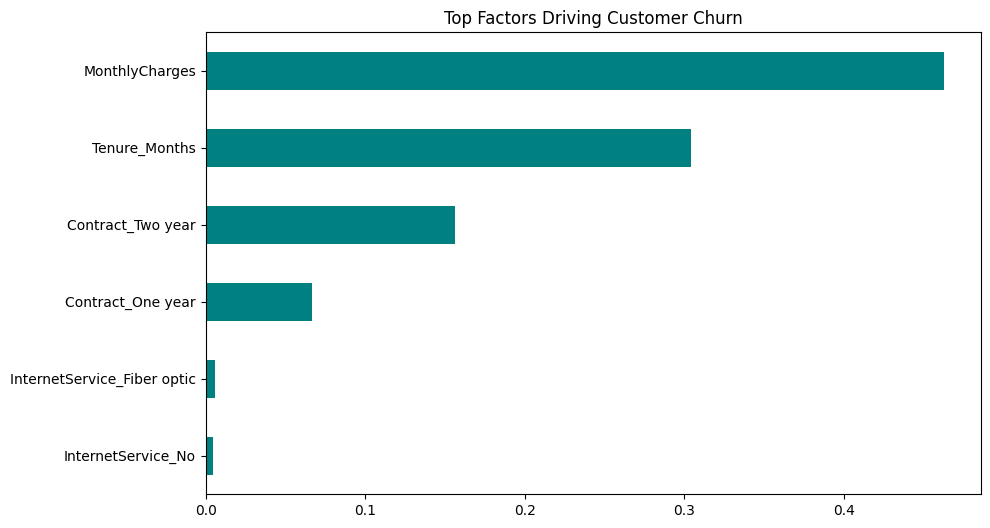

In [1]:
import sys
import os
import pandas as pd

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..')))

from src.feature_engineering import preprocess_data, split_data
from src.model_trainer import train_churn_model, evaluate_model

# 1. Load Data
print("Loading Data...")
df = pd.read_csv('../data/raw/telecom_churn_v1.csv')

# 2. Preprocess (Convert Text to Numbers)
X, y = preprocess_data(df)
print("Data Shape after processing:", X.shape)
display(X.head())

# 3. Split Data
X_train, X_test, y_train, y_test = split_data(X, y)

# 4. Train Model
model = train_churn_model(X_train, y_train)

# 5. Evaluate
evaluate_model(model, X_test, y_test)

# 6. Feature Importance (Why did the model choose what it chose?)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importance.sort_values().plot(kind='barh', color='teal')
plt.title('Top Factors Driving Customer Churn')
plt.show()